## 00. Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# import nltk
# nltk.download('stopwords')

In [3]:
# import nltk
# nltk.download('omw-1.4')

In [4]:
# import nltk
# nltk.download('wordnet')

In [5]:
# import nltk
# nltk.download('punkt')

## 01. Loading Data & EDA .....

In [6]:
news_dataset = pd.read_csv('fake-news/train.csv')

In [7]:
# print information about dataset
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
# print a sampel rows of the dataframe
news_dataset.sample(5)

,id,title,author,text,label
6584,6584,Japanese Leader Offers Condolences in Visit to...,Michael S. Schmidt,"PEARL HARBOR, Hawaii — years after Imperi...",0
7759,7759,Witnesses Come Forward Following Facebook Live...,Virginia Hale,A woman who watched in horror at the gang rape...,0
1462,1462,Anti-Trump PAC files complaint against FBI for...,LU Staff,Print \nThe Democratic Coalition Against Trump...,1
3674,3674,Washington Post Cries Uncle: Stop Using ’Taint...,Breitbart News,"Writing at the Washington Post, Margaret Sulli...",0
19161,19161,A Parable Of The Thanksgiving Turkey: He Never...,Mac Slavo,\nThe Black Swan Theory is used by Nassim Nich...,1


In [9]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [11]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [12]:
# print a sampel rows of the dataframe
news_dataset.sample(5)

,id,title,author,text,label,content
10744,10744,California Secessionists to Meet at Capitol Da...,,\nBy Joseph Jankowski \nAn organization which ...,1,California Secessionists to Meet at Capitol D...
17376,17376,Obama: ‘We Have Not Had a Major Scandal’ in My...,admin,by CHARLIE SPIERING President Barack Obama arg...,1,admin Obama: ‘We Have Not Had a Major Scandal’...
15459,15459,Review: ‘Hairspray Live!’ Had Power Voices but...,Neil Genzlinger,"For “Hairspray Live!” on Wednesday night, NBC ...",0,Neil Genzlinger Review: ‘Hairspray Live!’ Had ...
10262,10262,Study: Breitbart Dominated Right Wing Coverage...,Allum Bokhari,A study from the Columbia Journalism Review (C...,0,Allum Bokhari Study: Breitbart Dominated Right...
1335,1335,Extended Interview: Jorge Ramos Talks Race wit...,Henry Wolff,"American Renaissance, October 31, 2016 Share T...",1,Henry Wolff Extended Interview: Jorge Ramos Ta...


In [13]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


## 02. Preprocessing& normalize newes_dataset

In [14]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:

port_stem = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [17]:
# Function for entire text transformation

def text_preprocessing(text): 
    # Convert text into lowercase
    text = text.lower()
    # lemmaization 
    #lemmaization_text=lemmatizer.lemmatize(text,pos='v')
    
    #segmentation
    #######sent_text=nltk.sent_tokenize(text)###########
    
    # Tokenize text into list
    tokenize_text = nltk.word_tokenize(text)

    # remove Stopwords
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    
    # Remove Punctuation
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]
    
    # fetch only alphanumeric values and apply stemming on that word
    transformed_text = [port_stem.stem(i) for i in text_without_punc if i.isalnum() == True]
    
    return " ".join(transformed_text)

In [18]:
# Let's Apply This Transformation Function on Our Content Column
news_dataset['transformed_content'] = news_dataset['content'].apply(text_preprocessing)

In [19]:
# Drop title author and old content column
preproceesing_data = news_dataset.drop(['id','text','title','author','content'],axis=1)

In [20]:
preproceesing_data.head(5)

,label,transformed_content
0,1,darrel lucu hous dem aid even see comey letter...
1,0,daniel flynn flynn hillari clinton big woman c...
2,1,truth might get fire
3,1,jessica purkiss 15 civilian kill singl us airs...
4,1,howard portnoy iranian woman jail fiction unpu...


## 2.1 split Dataset to "X" for Inputs "y" for target

In [21]:
X=news_dataset.transformed_content.values
y=news_dataset.label.values

## 03. Feature Extraction

### 3.1 Binary vectorlization

 **Convert a collection of text documents to a matrix of token counts.**

In [22]:
 from sklearn.feature_extraction.text import CountVectorizer
binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(X)

X_Binaryvectorlizing = binary_vectorizer.transform(X)

In [23]:
print(X_Binaryvectorlizing)

  (0, 690)	1
  (0, 2881)	1
  (0, 3339)	1
  (0, 3970)	1
  (0, 4157)	1
  (0, 5344)	1
  (0, 7348)	1
  (0, 8032)	1
  (0, 8953)	1
  (0, 9216)	1
  (0, 13725)	1
  (0, 15888)	1
  (1, 1908)	1
  (1, 2297)	1
  (1, 2623)	1
  (1, 3195)	1
  (1, 3938)	1
  (1, 5870)	1
  (1, 7168)	1
  (1, 16982)	1
  (2, 5758)	1
  (2, 6338)	1
  (2, 9931)	1
  (2, 15812)	1
  (3, 68)	1
  :	:
  (20797, 4012)	1
  (20797, 7384)	1
  (20797, 8699)	1
  (20797, 9305)	1
  (20797, 9833)	1
  (20797, 9900)	1
  (20797, 10603)	1
  (20797, 12418)	1
  (20797, 12616)	1
  (20797, 13380)	1
  (20797, 15191)	1
  (20797, 15503)	1
  (20797, 17176)	1
  (20798, 770)	1
  (20798, 1007)	1
  (20798, 1540)	1
  (20798, 5403)	1
  (20798, 7235)	1
  (20798, 10483)	1
  (20798, 11327)	1
  (20798, 13297)	1
  (20799, 798)	1
  (20799, 3993)	1
  (20799, 8378)	1
  (20799, 15072)	1


In [24]:
import pandas as pd 
pd.DataFrame(X_Binaryvectorlizing.toarray(),columns=binary_vectorizer.vocabulary_.keys())

,darrel,lucu,hous,dem,aid,even,see,comey,letter,jason,...,koala,decompos,samuelson,proclam,instil,004,xfrozenlpx,airman,kratom,ghouta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Count vectorlization 

**Convert a collection of text documents to a matrix of token counts.**

In [25]:
 from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer(binary=False)
countvectorizer.fit(X)
X_countvectorlizing = countvectorizer.transform(X)

In [26]:
print(X_countvectorlizing)

  (0, 690)	1
  (0, 2881)	1
  (0, 3339)	1
  (0, 3970)	1
  (0, 4157)	1
  (0, 5344)	1
  (0, 7348)	1
  (0, 8032)	1
  (0, 8953)	1
  (0, 9216)	1
  (0, 13725)	1
  (0, 15888)	1
  (1, 1908)	1
  (1, 2297)	1
  (1, 2623)	1
  (1, 3195)	1
  (1, 3938)	1
  (1, 5870)	2
  (1, 7168)	1
  (1, 16982)	1
  (2, 5758)	1
  (2, 6338)	1
  (2, 9931)	1
  (2, 15812)	1
  (3, 68)	1
  :	:
  (20797, 4012)	1
  (20797, 7384)	1
  (20797, 8699)	1
  (20797, 9305)	1
  (20797, 9833)	1
  (20797, 9900)	1
  (20797, 10603)	1
  (20797, 12418)	1
  (20797, 12616)	1
  (20797, 13380)	1
  (20797, 15191)	1
  (20797, 15503)	1
  (20797, 17176)	1
  (20798, 770)	1
  (20798, 1007)	1
  (20798, 1540)	1
  (20798, 5403)	1
  (20798, 7235)	1
  (20798, 10483)	1
  (20798, 11327)	1
  (20798, 13297)	1
  (20799, 798)	1
  (20799, 3993)	1
  (20799, 8378)	1
  (20799, 15072)	1


In [27]:
pd.DataFrame(X_countvectorlizing.toarray(),columns=countvectorizer.vocabulary_.keys())

,darrel,lucu,hous,dem,aid,even,see,comey,letter,jason,...,koala,decompos,samuelson,proclam,instil,004,xfrozenlpx,airman,kratom,ghouta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.3 Tfidf Vectorizer

**Convert a collection of raw documents to a matrixof TF-IDF features**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer()
tfidf_vectorizer.fit(X)
X_tfidfvectorlizing = tfidf_vectorizer.transform(X)

In [29]:
print(X_tfidfvectorlizing)

  (0, 15888)	0.28625289852735913
  (0, 13725)	0.2580934148486778
  (0, 9216)	0.3630109997931484
  (0, 8953)	0.29165482689235944
  (0, 8032)	0.24745315953469016
  (0, 7348)	0.2191666713936137
  (0, 5344)	0.23294133258177097
  (0, 4157)	0.2700976964996027
  (0, 3970)	0.3593144988552644
  (0, 3339)	0.24669676636021745
  (0, 2881)	0.367060058447611
  (0, 690)	0.27097366487431873
  (1, 16982)	0.30091461340148384
  (1, 7168)	0.19097333855189003
  (1, 5870)	0.7130781988000774
  (1, 3938)	0.263275534445284
  (1, 3195)	0.19154202675981094
  (1, 2623)	0.38394698030281466
  (1, 2297)	0.15496739045917518
  (1, 1908)	0.2950703830575609
  (2, 15812)	0.5038529465718563
  (2, 9931)	0.5926575280742765
  (2, 6338)	0.4172631176818622
  (2, 5758)	0.46987312465191994
  (3, 16236)	0.21417585569235162
  :	:
  (20797, 13380)	0.24822994603476345
  (20797, 12616)	0.2726096590475358
  (20797, 12418)	0.24775993102017302
  (20797, 10603)	0.08039584481660617
  (20797, 9900)	0.1745375268446896
  (20797, 9833)	0.2953

In [30]:
pd.DataFrame(X_tfidfvectorlizing.toarray(),columns=tfidf_vectorizer.vocabulary_.keys())

,darrel,lucu,hous,dem,aid,even,see,comey,letter,jason,...,koala,decompos,samuelson,proclam,instil,004,xfrozenlpx,airman,kratom,ghouta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 04. Split  Vectoralizing Dataset To [X_train, X_test, y_train, y_test ]

#### 4.1 Binary vectorlization

In [31]:
from sklearn.model_selection import train_test_split
BX_train, BX_test, By_train, By_test = train_test_split(X_Binaryvectorlizing.toarray(), y, test_size = 0.2, random_state=29102000)

#### 4.2 Count vectorlization 

In [32]:
from sklearn.model_selection import train_test_split
CX_train, CX_test, Cy_train, Cy_test = train_test_split(X_countvectorlizing.toarray(), y, test_size = 0.2, random_state=29102000)

#### 4.3 Tfidf Vectorizer

In [33]:
from sklearn.model_selection import train_test_split
TFX_train, TFX_test, TFy_train, TFy_test = train_test_split(X_tfidfvectorlizing.toarray(), y, test_size = 0.2, random_state=29102000)

## 05. Building Model

In [34]:
def Building_Model(model,X_train, X_test, y_train, y_test):
    # make an object from model
    model_object = model()
    # fit model And predict the test
    pred = model_object.fit(X_train, y_train).predict(X_test)
    # calculate the score
    acc=accuracy_score(pred, y_test)
    print(f'Accuracy score  : {acc*100:.4f}')
    print("\n-------------------\n")
    # make a confusion_matrix
    cfmatrix=confusion_matrix(y_test, pred)
    print(f"Confusion Matrix :\n {cfmatrix}")
    # visualize the Confusion Matrix
    sns.heatmap(cfmatrix, annot=True,)
    plt.title("Confusion Matrix")
    plt.show()    

### 5.1 Binary vectorlization

**1. MultinomialNB Naive Bayes**

Accuracy score  : 96.0817

-------------------

Confusion Matrix :
 [[2019   18]
 [ 145 1978]]


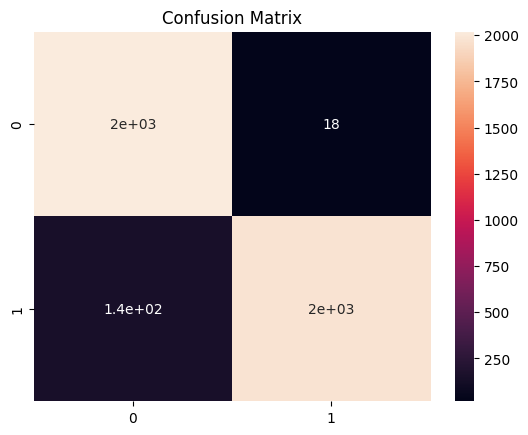

In [35]:
Building_Model(MultinomialNB,BX_train, BX_test, By_train, By_test)

**2. LogisticRegression**

Accuracy score  : 98.8221

-------------------

Confusion Matrix :
 [[1995   42]
 [   7 2116]]


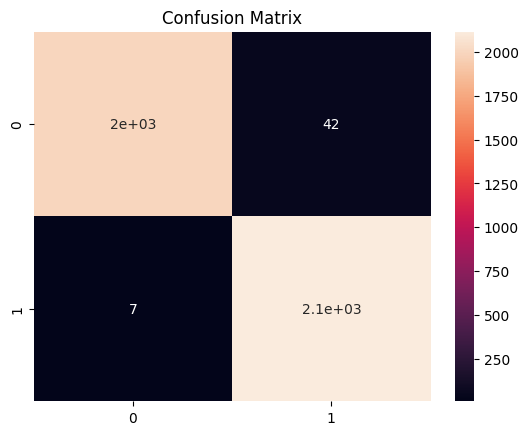

In [36]:
Building_Model(LogisticRegression,BX_train, BX_test, By_train, By_test)

**3. GradientBoostingClassifier**

In [37]:
#Building_Model(GradientBoostingClassifier,BX_train, BX_test, By_train, By_test)

**4. svmclassifair**

In [38]:
#Building_Model(SVC,BX_train, BX_test, By_train, By_test)

### 5.2 Count vectorlization 

**1. MultinomialNB Naive Bayes**

Accuracy score  : 96.0337

-------------------

Confusion Matrix :
 [[2017   20]
 [ 145 1978]]


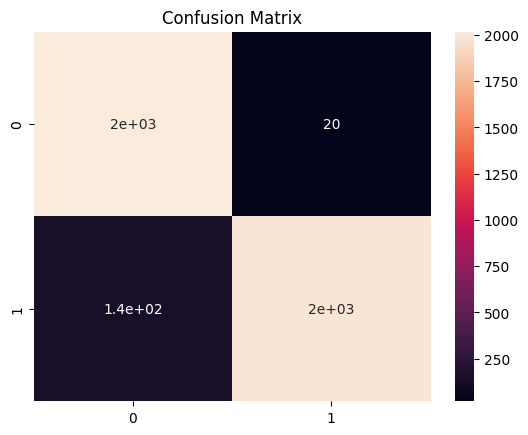

In [40]:
Building_Model(MultinomialNB, CX_train, CX_test, Cy_train, Cy_test)

**2. LogisticRegression**

Accuracy score  : 99.0144

-------------------

Confusion Matrix :
 [[2004   33]
 [   8 2115]]


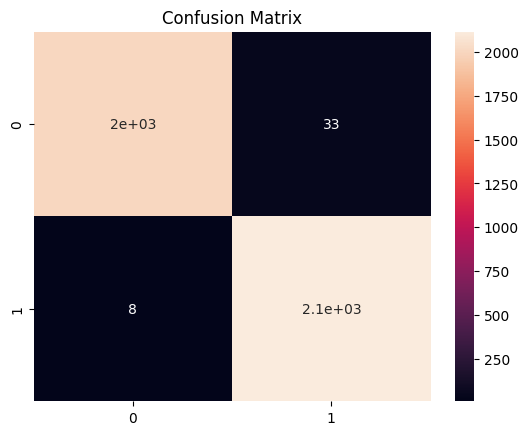

In [41]:
Building_Model(LogisticRegression,CX_train, CX_test, Cy_train, Cy_test)

**3. GradientBoostingClassifier**

In [42]:
#Building_Model(GradientBoostingClassifier,CX_train, CX_test, Cy_train, Cy_test)

**4. svmclassifair**

In [43]:
#Building_Model(SVC,TFX_train, CX_train, CX_test, Cy_train, Cy_test)

### 5.3 Tfidf Vectorizer

**1. MultinomialNB Naive Bayes**

Accuracy score  : 94.7115

-------------------

Confusion Matrix :
 [[2021   16]
 [ 204 1919]]


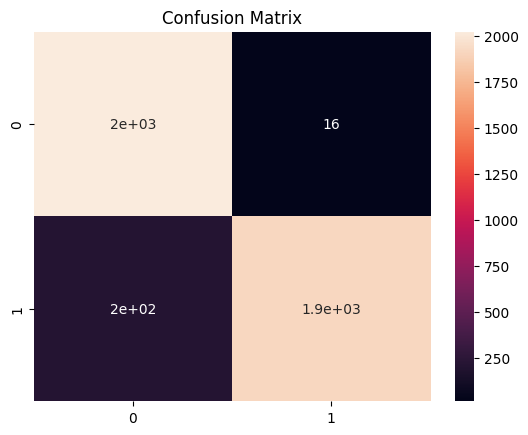

In [44]:
Building_Model(MultinomialNB,TFX_train, TFX_test, TFy_train, TFy_test)

**2. LogisticRegression**

Accuracy score  : 97.5000

-------------------

Confusion Matrix :
 [[1956   81]
 [  23 2100]]


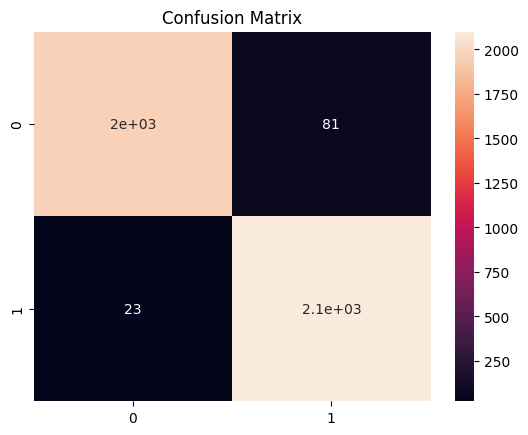

In [45]:
Building_Model(LogisticRegression,TFX_train, TFX_test, TFy_train, TFy_test)

**3. GradientBoostingClassifier**

In [46]:
#Building_Model(GradientBoostingClassifier,TFX_train, TFX_test, TFy_train, TFy_test)

**4. svmclassifair**

In [47]:
#Building_Model(SVC,TFX_train, TFX_test, TFy_train, TFy_test)